# Librerias y funciones

In [ ]:
import string
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

## Limpiar texto

In [ ]:
def _limpiar_texto_de_gutenberg(text, th='this'):
    start_fence = f"start of {th} project gutenberg ebook"
    end_fence = f"end of {th} project gutenberg ebook"
    text = text.lower()
    start_pos = text.find(start_fence) + len(start_fence) + 1
    end_pos = text.find(end_fence)

    # Chequeamos que las marcas esten razonablemente ubicadas.
    assert 0.000001 < start_pos / len(text) <= 0.1
    assert 0.0000009 < end_pos / len(text) <= 1.0

    return text[start_pos:end_pos]

## Contar Palabras

In [ ]:
def contar_palabras(f, clean_text=False, th='this'):
    text = f.read()
    if clean_text:
        text = _limpiar_texto_de_gutenberg(text, th)

    chunks = text.split()
    npunc = [word.strip(string.punctuation) for word in chunks]
    word_list = [word.lower() for word in npunc if word]
    word_counts = collections.Counter(word_list)
    return dict(word_counts)

## Leer archivo

In [ ]:
def leer(archivo, th='this'):
    with open(archivo, "r") as f:
        word_counts = contar_palabras(f, True, th)
        df = pd.DataFrame(
                [
                    {"palabra": x, "frecuencia": y}
                    for x, y in zip(word_counts.keys(), word_counts.values())
                ]
            )
        df = df.sort_values("frecuencia", ascending=False)
    return df

# Desarrollo

Funciones para el ajuste

In [ ]:
def zipf(rank, c, alpha): return c*rank**alpha
def zipf_mandelbrot(rank, c, beta, alpha): return c*(rank + beta)**alpha

## Alicia

Leo los libros

In [ ]:
Alicia_esperanto = leer('Alicia(esperanto).txt', 'this')
Alicia_ingles = leer('Alicia(ingles).txt', 'the')
Alicia_italiano = leer('Alicia(italiano).txt', 'the')

Armo una lista de los ranks de las palabras

In [ ]:
#Armo los ranks
rank1 = np.arange(Alicia_esperanto.shape[0]) + 1
rank1c = rank1[80:]

rank2 = np.arange(Alicia_ingles.shape[0]) + 1
rank2c = rank2[80:]

rank3 = np.arange(Alicia_italiano.shape[0]) + 1
rank3c = rank3[80:]

Realizo los ajustes de mis datos

In [ ]:
#Ajustes esperanto
popt, pcov = curve_fit(zipf, rank1, Alicia_esperanto.frecuencia)
c_zipf_esperanto = popt[0]
alpha_zipf_esperanto = popt[1]
incertezas_zipf_esperanto = np.sqrt(np.diag(pcov))

p0=[c_zipf_esperanto, 1, alpha_zipf_esperanto*2]
popt, pcov = curve_fit(zipf_mandelbrot, rank1, Alicia_esperanto.frecuencia, p0)
c_zipfM_esperanto = popt[0]
beta_zipfM_esperanto = popt[1]
alpha_zipfM_esperanto = popt[2]
incertezas_zipfM_esperanto = np.sqrt(np.diag(pcov))
#----------Ahora cortando las palabras que son conectores-----------------------
popt, pcov = curve_fit(zipf, rank1c, Alicia_esperanto.frecuencia[80:])
c_zipf_esperantoC = popt[0]
alpha_zipf_esperantoC = popt[1]
incertezas_zipf_esperantoC = np.sqrt(np.diag(pcov))

p0=[c_zipf_esperanto, 1, alpha_zipf_esperanto*2]
popt, pcov = curve_fit(zipf_mandelbrot, rank1c, Alicia_esperanto.frecuencia[80:], p0)
c_zipfM_esperantoC = popt[0]
beta_zipfM_esperantoC = popt[1]
alpha_zipfM_esperantoC = popt[2]
incertezas_zipfM_esperantoC = np.sqrt(np.diag(pcov))

#Ajustes ingles
popt, pcov = curve_fit(zipf, rank2, Alicia_ingles.frecuencia)
c_zipf_ingles = popt[0]
alpha_zipf_ingles = popt[1]
incertezas_zipf_ingles = np.sqrt(np.diag(pcov))

p0=[c_zipf_ingles, 1, alpha_zipf_ingles*2]
popt, pcov = curve_fit(zipf_mandelbrot, rank2, Alicia_ingles.frecuencia, p0)
c_zipfM_ingles = popt[0]
beta_zipfM_ingles = popt[1]
alpha_zipfM_ingles = popt[2]
incertezas_zipfM_ingles = np.sqrt(np.diag(pcov))
#----------Ahora cortando las palabras que son conectores-----------------------
popt, pcov = curve_fit(zipf, rank2c, Alicia_ingles.frecuencia[80:])
c_zipf_inglesC = popt[0]
alpha_zipf_inglesC = popt[1]
incertezas_zipf_inglesC = np.sqrt(np.diag(pcov))

p0=[c_zipf_ingles, 1, alpha_zipf_ingles*2]
popt, pcov = curve_fit(zipf_mandelbrot, rank2c, Alicia_ingles.frecuencia[80:], p0)
c_zipfM_inglesC = popt[0]
beta_zipfM_inglesC = popt[1]
alpha_zipfM_inglesC = popt[2]
incertezas_zipfM_inglesC = np.sqrt(np.diag(pcov))

#Ajustes italiano
popt, pcov = curve_fit(zipf, rank3, Alicia_italiano.frecuencia)
c_zipf_italiano = popt[0]
alpha_zipf_italiano = popt[1]
incertezas_zipf_italiano = np.sqrt(np.diag(pcov))

p0=[c_zipf_italiano, 1, alpha_zipf_italiano*2]
popt, pcov = curve_fit(zipf_mandelbrot, rank3, Alicia_italiano.frecuencia, p0)
c_zipfM_italiano = popt[0]
beta_zipfM_italiano = popt[1]
alpha_zipfM_italiano = popt[2]
incertezas_zipfM_italiano = np.sqrt(np.diag(pcov))
#----------Ahora cortando las palabras que son conectores-----------------------
popt, pcov = curve_fit(zipf, rank3c, Alicia_italiano.frecuencia[80:])
c_zipf_italianoC = popt[0]
alpha_zipf_italianoC = popt[1]
incertezas_zipf_italianoC = np.sqrt(np.diag(pcov))

p0=[c_zipf_italiano, 1, alpha_zipf_italiano*2]
popt, pcov = curve_fit(zipf_mandelbrot, rank3c, Alicia_italiano.frecuencia[80:], p0)
c_zipfM_italianoC = popt[0]
beta_zipfM_italianoC = popt[1]
alpha_zipfM_italianoC = popt[2]
incertezas_zipfM_italianoC = np.sqrt(np.diag(pcov))

<ipython-input-236-e28f3b06e76c>:2: RuntimeWarning: invalid value encountered in power
  def zipf_mandelbrot(rank, c, beta, alpha): return c*(rank + beta)**alpha
<ipython-input-236-e28f3b06e76c>:2: RuntimeWarning: overflow encountered in power
  def zipf_mandelbrot(rank, c, beta, alpha): return c*(rank + beta)**alpha
<ipython-input-236-e28f3b06e76c>:2: RuntimeWarning: overflow encountered in multiply
  def zipf_mandelbrot(rank, c, beta, alpha): return c*(rank + beta)**alpha


Graficos

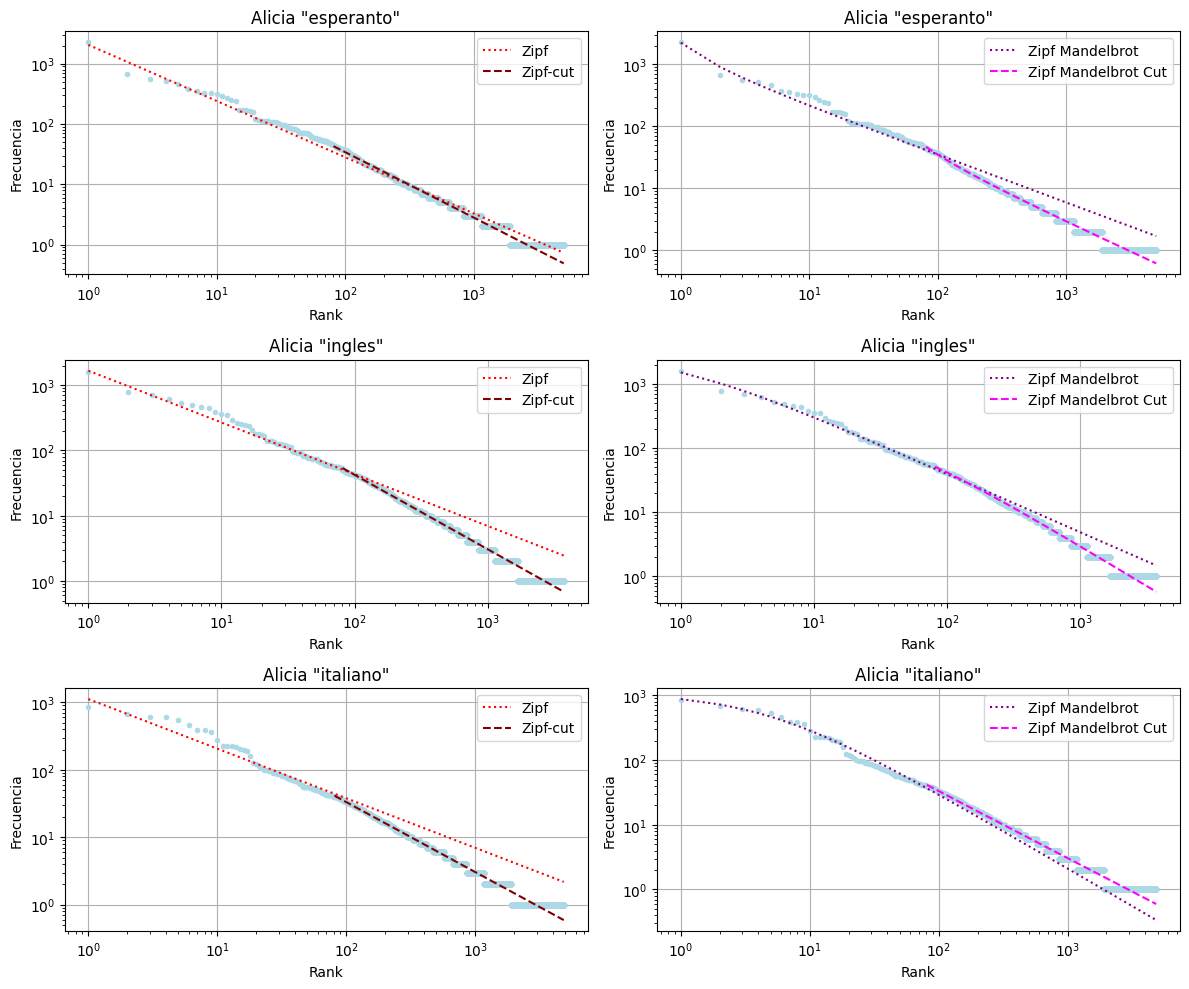

In [ ]:
#Graficos
fig = plt.figure(figsize=(12,10))
spec = fig.add_gridspec(3,2)

ax11 = fig.add_subplot(spec[0,0])
ax12 = fig.add_subplot(spec[0,1])
ax21 = fig.add_subplot(spec[1,0])
ax22 = fig.add_subplot(spec[1,1])
ax31 = fig.add_subplot(spec[2,0])
ax32 = fig.add_subplot(spec[2,1])

#Esperanto
ax11.plot(rank1, Alicia_esperanto.frecuencia, color='lightblue', marker='.', linestyle='None')
ax11.plot(rank1, zipf(rank1, c_zipf_esperanto, alpha_zipf_esperanto), color='red', linestyle=':', marker='None', label='Zipf')
ax11.plot(rank1c, zipf(rank1c, c_zipf_esperantoC, alpha_zipf_esperantoC), color='maroon', linestyle='--', marker='None', label='Zipf-cut')
ax11.set(xscale='log', yscale='log', xlabel='Rank', ylabel='Frecuencia', title='Alicia "esperanto"')
ax11.grid()
ax11.legend(loc='upper right')

ax12.plot(rank1, Alicia_esperanto.frecuencia, color='lightblue', marker='.', linestyle='None')
ax12.plot(rank1, zipf_mandelbrot(rank1, c_zipfM_esperanto, beta_zipfM_esperanto, alpha_zipfM_esperanto), color='purple', linestyle=':', marker='None', label='Zipf Mandelbrot')
ax12.plot(rank1c, zipf_mandelbrot(rank1c, c_zipfM_esperantoC, beta_zipfM_esperantoC, alpha_zipfM_esperantoC), color='fuchsia', linestyle='--', marker='None', label='Zipf Mandelbrot Cut')
ax12.set(xscale='log', yscale='log', xlabel='Rank', ylabel='Frecuencia', title='Alicia "esperanto"')
ax12.grid()
ax12.legend(loc='upper right')

#Ingles
ax21.plot(rank2, Alicia_ingles.frecuencia, color='lightblue', marker='.', linestyle='None')
ax21.plot(rank2, zipf(rank2, c_zipf_ingles, alpha_zipf_ingles), color='red', linestyle=':', marker='None', label='Zipf')
ax21.plot(rank2c, zipf(rank2c, c_zipf_inglesC, alpha_zipf_inglesC), color='maroon', linestyle='--', marker='None', label='Zipf-cut')
ax21.set(xscale='log', yscale='log', xlabel='Rank', ylabel='Frecuencia', title='Alicia "ingles"')
ax21.grid()
ax21.legend(loc='upper right')

ax22.plot(rank2, Alicia_ingles.frecuencia, color='lightblue', marker='.', linestyle='None')
ax22.plot(rank2, zipf_mandelbrot(rank2, c_zipfM_ingles, beta_zipfM_ingles, alpha_zipfM_ingles), color='purple', linestyle=':', marker='None', label='Zipf Mandelbrot')
ax22.plot(rank2c, zipf_mandelbrot(rank2c, c_zipfM_inglesC, beta_zipfM_inglesC, alpha_zipfM_inglesC), color='fuchsia', linestyle='--', marker='None', label='Zipf Mandelbrot Cut')
ax22.set(xscale='log', yscale='log', xlabel='Rank', ylabel='Frecuencia', title='Alicia "ingles"')
ax22.grid()
ax22.legend(loc='upper right')

#Italiano
ax31.plot(rank3, Alicia_italiano.frecuencia, color='lightblue', marker='.', linestyle='None')
ax31.plot(rank3, zipf(rank3, c_zipf_italiano, alpha_zipf_italiano), color='red', linestyle=':', marker='None', label='Zipf')
ax31.plot(rank3c, zipf(rank3c, c_zipf_italianoC, alpha_zipf_italianoC), color='maroon', linestyle='--', marker='None', label='Zipf-cut')
ax31.set(xscale='log', yscale='log', xlabel='Rank', ylabel='Frecuencia', title='Alicia "italiano"')
ax31.grid()
ax31.legend(loc='upper right')

ax32.plot(rank3, Alicia_italiano.frecuencia, color='lightblue', marker='.', linestyle='None')
ax32.plot(rank3, zipf_mandelbrot(rank3, c_zipfM_italiano, beta_zipfM_italiano, alpha_zipfM_italiano), color='purple', linestyle=':', marker='None', label='Zipf Mandelbrot')
ax32.plot(rank3c, zipf_mandelbrot(rank3c, c_zipfM_italianoC, beta_zipfM_italianoC, alpha_zipfM_italianoC), color='fuchsia', linestyle='--', marker='None', label='Zipf Mandelbrot Cut')
ax32.set(xscale='log', yscale='log', xlabel='Rank', ylabel='Frecuencia', title='Alicia "italiano"')
ax32.grid()
ax32.legend(loc='upper right')

fig.tight_layout()
plt.show()

Comparo los datos obtenidos de los ajustes

In [ ]:
#Esperanto
print(f'Esperanto:\nEl alpha obtenido de zipf es: [{alpha_zipf_esperanto} +- {incertezas_zipf_esperanto[0]}] || Mientras que el obtenido por zipf-Manderbrot es: [{alpha_zipfM_esperanto} +- {incertezas_zipfM_esperanto[0]}]')
print(f'En cambio cortando las palabras que tienen sentido de conectores, con zipf tienen un alpha de: [{alpha_zipf_esperantoC} +- {incertezas_zipf_esperantoC[0]}] || Mientras que por zipf-Manderbrot es : [{alpha_zipfM_esperantoC} +- {incertezas_zipfM_esperantoC[0]}]\n\n')

#Ingles
print(f'Ingles:\nEl alpha obtenido de zipf es: [{alpha_zipf_ingles} +- {incertezas_zipf_ingles[0]}] || Mientras que el obtenido por zipf-Manderbrot es: [{alpha_zipfM_ingles} +- {incertezas_zipfM_ingles[0]}]')
print(f'En cambio cortando las palabras que tienen sentido de conectores, con zipf tienen un alpha de: [{alpha_zipf_inglesC} +- {incertezas_zipf_inglesC[0]}] || Mientras que por zipf-Manderbrot es : [{alpha_zipfM_inglesC} +- {incertezas_zipfM_inglesC[0]}]\n\n')
#Italiano
print(f'Italiano:\nEl alpha obtenido de zipf es: [{alpha_zipf_italiano} +- {incertezas_zipf_italiano[0]}] || Mientras que el obtenido por zipf-Manderbrot es: [{alpha_zipfM_italiano} +- {incertezas_zipfM_italiano[0]}]')
print(f'En cambio cortando las palabras que tienen sentido de conectores, con zipf tienen un alpha de: [{alpha_zipf_italianoC} +- {incertezas_zipf_italianoC[0]}] || Mientras que por zipf-Manderbrot es : [{alpha_zipfM_italianoC} +- {incertezas_zipfM_italianoC[0]}]\n\n')

Esperanto:
El alpha obtenido de zipf es: [-0.9316027953849481 +- 6.624589878442386] || Mientras que el obtenido por zipf-Manderbrot es: [-0.7731087514463632 +- 9.21119354675626]
En cambio cortando las palabras que tienen sentido de conectores, con zipf tienen un alpha de: [-1.084603495684737 +- 38.31241189149282] || Mientras que por zipf-Manderbrot es : [-0.9566604720883728 +- 29.885723416637305]


Ingles:
El alpha obtenido de zipf es: [-0.7932640925774547 +- 5.454408920471465] || Mientras que el obtenido por zipf-Manderbrot es: [-0.910192441801008 +- 31.27248792706931]
En cambio cortando las palabras que tienen sentido de conectores, con zipf tienen un alpha de: [-1.140304793933845 +- 56.145465796010704] || Mientras que por zipf-Manderbrot es : [-1.2542021629721967 +- 444.2130305655785]


Italiano:
El alpha obtenido de zipf es: [-0.7354223713977361 +- 6.416059647772526] || Mientras que el obtenido por zipf-Manderbrot es: [-1.1610954168764174 +- 119.20281434088734]
En cambio cortando l

## Don Quijote

Leo los libros

In [ ]:
Donquijote_catalan = leer('DonQuijote(catalan).txt', 'the')
Donquijote_español = leer('DonQuijote(español).txt', 'the')
Donquijote_finnish = leer('DonQuijote(finnish).txt')
Donquijote_hungaro = leer('DonQuijote(hungaro).txt', 'the')

Armo una lista de los ranks de las palabras

In [ ]:
#Armo los ranks
rank1 = np.arange(Donquijote_catalan.shape[0]) + 1
rank1c = rank1[80:]

rank2 = np.arange(Donquijote_español.shape[0]) + 1
rank2c = rank2[80:]

rank3 = np.arange(Donquijote_finnish.shape[0]) + 1
rank3c = rank3[80:]

rank4 = np.arange(Donquijote_hungaro.shape[0]) + 1
rank4c = rank4[80:]

Realizo los ajustes de mis datos

In [ ]:
#Ajustes catalan
popt, pcov = curve_fit(zipf, rank1, Donquijote_catalan.frecuencia)
c_zipf_catalan = popt[0]
alpha_zipf_catalan = popt[1]
incertezas_zipf_catalan = np.sqrt(np.diag(pcov))

p0=[c_zipf_catalan, 1, alpha_zipf_catalan*2]
popt, pcov = curve_fit(zipf_mandelbrot, rank1, Donquijote_catalan.frecuencia, p0)
c_zipfM_catalan = popt[0]
beta_zipfM_catalan = popt[1]
alpha_zipfM_catalan = popt[2]
incertezas_zipfM_catalan = np.sqrt(np.diag(pcov))
#----------Ahora cortando las palabras que son conectores-----------------------
popt, pcov = curve_fit(zipf, rank1c, Donquijote_catalan.frecuencia[80:])
c_zipf_catalanC = popt[0]
alpha_zipf_catalanC = popt[1]
incertezas_zipf_catalanC = np.sqrt(np.diag(pcov))

p0=[c_zipf_catalan, 1, alpha_zipf_catalan*2]
popt, pcov = curve_fit(zipf_mandelbrot, rank1c, Donquijote_catalan.frecuencia[80:], p0)
c_zipfM_catalanC = popt[0]
beta_zipfM_catalanC = popt[1]
alpha_zipfM_catalanC = popt[2]
incertezas_zipfM_catalanC = np.sqrt(np.diag(pcov))

#Ajustes español
popt, pcov = curve_fit(zipf, rank2, Donquijote_español.frecuencia)
c_zipf_español = popt[0]
alpha_zipf_español = popt[1]
incertezas_zipf_español = np.sqrt(np.diag(pcov))

p0=[c_zipf_español, 1, alpha_zipf_español*2]
popt, pcov = curve_fit(zipf_mandelbrot, rank2, Donquijote_español.frecuencia, p0)
c_zipfM_español = popt[0]
beta_zipfM_español = popt[1]
alpha_zipfM_español = popt[2]
incertezas_zipfM_español = np.sqrt(np.diag(pcov))
#----------Ahora cortando las palabras que son conectores-----------------------
popt, pcov = curve_fit(zipf, rank2c, Donquijote_español.frecuencia[80:])
c_zipf_españolC = popt[0]
alpha_zipf_españolC = popt[1]
incertezas_zipf_españolC = np.sqrt(np.diag(pcov))

p0=[c_zipf_español, 1, alpha_zipf_español*2]
popt, pcov = curve_fit(zipf_mandelbrot, rank2c, Donquijote_español.frecuencia[80:], p0)
c_zipfM_españolC = popt[0]
beta_zipfM_españolC = popt[1]
alpha_zipfM_españolC = popt[2]
incertezas_zipfM_españolC = np.sqrt(np.diag(pcov))

#Ajustes finnish
popt, pcov = curve_fit(zipf, rank3, Donquijote_finnish.frecuencia)
c_zipf_finnish = popt[0]
alpha_zipf_finnish = popt[1]
incertezas_zipf_finnish = np.sqrt(np.diag(pcov))

p0=[c_zipf_finnish, 1, alpha_zipf_finnish*2]
popt, pcov = curve_fit(zipf_mandelbrot, rank3, Donquijote_finnish.frecuencia, p0)
c_zipfM_finnish = popt[0]
beta_zipfM_finnish = popt[1]
alpha_zipfM_finnish = popt[2]
incertezas_zipfM_finnish = np.sqrt(np.diag(pcov))
#----------Ahora cortando las palabras que son conectores-----------------------
popt, pcov = curve_fit(zipf, rank3c, Donquijote_finnish.frecuencia[80:])
c_zipf_finnishC = popt[0]
alpha_zipf_finnishC = popt[1]
incertezas_zipf_finnishC = np.sqrt(np.diag(pcov))

p0=[c_zipf_finnish, 1, alpha_zipf_finnish*2]
popt, pcov = curve_fit(zipf_mandelbrot, rank3c, Donquijote_finnish.frecuencia[80:], p0)
c_zipfM_finnishC = popt[0]
beta_zipfM_finnishC = popt[1]
alpha_zipfM_finnishC = popt[2]
incertezas_zipfM_finnishC = np.sqrt(np.diag(pcov))

#Ajustes hungaro
popt, pcov = curve_fit(zipf, rank4, Donquijote_hungaro.frecuencia)
c_zipf_hungaro = popt[0]
alpha_zipf_hungaro = popt[1]
incertezas_zipf_hungaro = np.sqrt(np.diag(pcov))

p0=[c_zipf_hungaro, 1, alpha_zipf_hungaro*2]
popt, pcov = curve_fit(zipf_mandelbrot, rank4, Donquijote_hungaro.frecuencia, p0)
c_zipfM_hungaro = popt[0]
beta_zipfM_hungaro = popt[1]
alpha_zipfM_hungaro = popt[2]
incertezas_zipfM_hungaro = np.sqrt(np.diag(pcov))
#----------Ahora cortando las palabras que son conectores-----------------------
popt, pcov = curve_fit(zipf, rank4c, Donquijote_hungaro.frecuencia[80:])
c_zipf_hungaroC = popt[0]
alpha_zipf_hungaroC = popt[1]
incertezas_zipf_hungaroC = np.sqrt(np.diag(pcov))

p0=[c_zipf_hungaro, 1, alpha_zipf_hungaro*2]
popt, pcov = curve_fit(zipf_mandelbrot, rank4c, Donquijote_hungaro.frecuencia[80:], p0)
c_zipfM_hungaroC = popt[0]
beta_zipfM_hungaroC = popt[1]
alpha_zipfM_hungaroC = popt[2]
incertezas_zipfM_hungaroC = np.sqrt(np.diag(pcov))

<ipython-input-236-e28f3b06e76c>:2: RuntimeWarning: invalid value encountered in power
  def zipf_mandelbrot(rank, c, beta, alpha): return c*(rank + beta)**alpha
<ipython-input-236-e28f3b06e76c>:2: RuntimeWarning: overflow encountered in power
  def zipf_mandelbrot(rank, c, beta, alpha): return c*(rank + beta)**alpha
<ipython-input-236-e28f3b06e76c>:2: RuntimeWarning: overflow encountered in multiply
  def zipf_mandelbrot(rank, c, beta, alpha): return c*(rank + beta)**alpha


Graficos

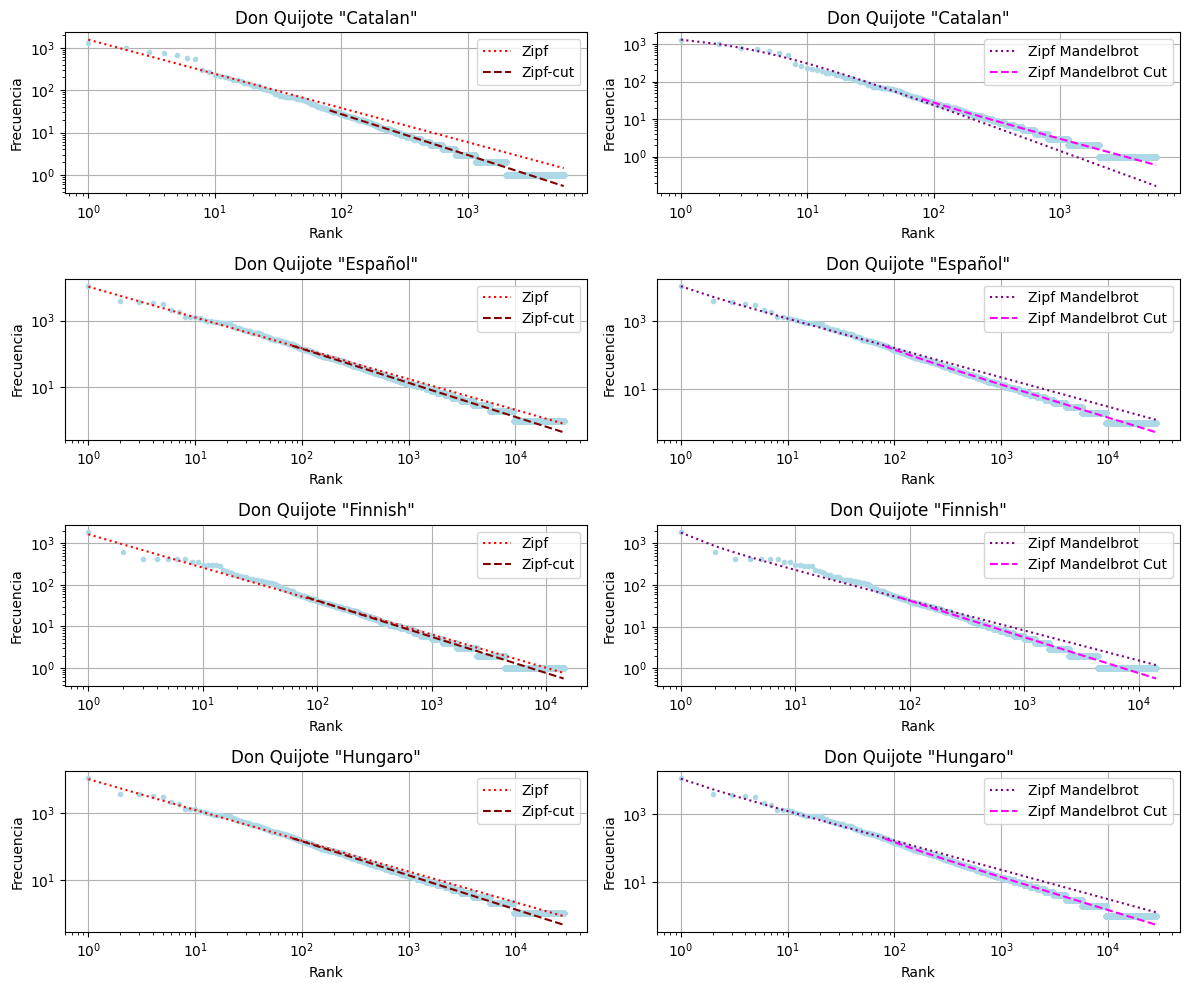

In [ ]:
#Graficos
fig = plt.figure(figsize=(12,10))
spec = fig.add_gridspec(4,2)

ax11 = fig.add_subplot(spec[0,0])
ax12 = fig.add_subplot(spec[0,1])
ax21 = fig.add_subplot(spec[1,0])
ax22 = fig.add_subplot(spec[1,1])
ax31 = fig.add_subplot(spec[2,0])
ax32 = fig.add_subplot(spec[2,1])
ax41 = fig.add_subplot(spec[3,0])
ax42 = fig.add_subplot(spec[3,1])

#Catalan
ax11.plot(rank1, Donquijote_catalan.frecuencia, color='lightblue', marker='.', linestyle='None')
ax11.plot(rank1, zipf(rank1, c_zipf_catalan, alpha_zipf_catalan), color='red', linestyle=':', marker='None', label='Zipf')
ax11.plot(rank1c, zipf(rank1c, c_zipf_catalanC, alpha_zipf_catalanC), color='maroon', linestyle='--', marker='None', label='Zipf-cut')
ax11.set(xscale='log', yscale='log', xlabel='Rank', ylabel='Frecuencia', title='Don Quijote "Catalan"')
ax11.grid()
ax11.legend(loc='upper right')

ax12.plot(rank1, Donquijote_catalan.frecuencia, color='lightblue', marker='.', linestyle='None')
ax12.plot(rank1, zipf_mandelbrot(rank1, c_zipfM_catalan, beta_zipfM_catalan, alpha_zipfM_catalan), color='purple', linestyle=':', marker='None', label='Zipf Mandelbrot')
ax12.plot(rank1c, zipf_mandelbrot(rank1c, c_zipfM_catalanC, beta_zipfM_catalanC, alpha_zipfM_catalanC), color='fuchsia', linestyle='--', marker='None', label='Zipf Mandelbrot Cut')
ax12.set(xscale='log', yscale='log', xlabel='Rank', ylabel='Frecuencia', title='Don Quijote "Catalan"')
ax12.grid()
ax12.legend(loc='upper right')

#Español
ax21.plot(rank2, Donquijote_español.frecuencia, color='lightblue', marker='.', linestyle='None')
ax21.plot(rank2, zipf(rank2, c_zipf_español, alpha_zipf_español), color='red', linestyle=':', marker='None', label='Zipf')
ax21.plot(rank2c, zipf(rank2c, c_zipf_españolC, alpha_zipf_españolC), color='maroon', linestyle='--', marker='None', label='Zipf-cut')
ax21.set(xscale='log', yscale='log', xlabel='Rank', ylabel='Frecuencia', title='Don Quijote "Español"')
ax21.grid()
ax21.legend(loc='upper right')

ax22.plot(rank2, Donquijote_español.frecuencia, color='lightblue', marker='.', linestyle='None')
ax22.plot(rank2, zipf_mandelbrot(rank2, c_zipfM_español, beta_zipfM_español, alpha_zipfM_español), color='purple', linestyle=':', marker='None', label='Zipf Mandelbrot')
ax22.plot(rank2c, zipf_mandelbrot(rank2c, c_zipfM_españolC, beta_zipfM_españolC, alpha_zipfM_españolC), color='fuchsia', linestyle='--', marker='None', label='Zipf Mandelbrot Cut')
ax22.set(xscale='log', yscale='log', xlabel='Rank', ylabel='Frecuencia', title='Don Quijote "Español"')
ax22.grid()
ax22.legend(loc='upper right')

#Finnish
ax31.plot(rank3, Donquijote_finnish.frecuencia, color='lightblue', marker='.', linestyle='None')
ax31.plot(rank3, zipf(rank3, c_zipf_finnish, alpha_zipf_finnish), color='red', linestyle=':', marker='None', label='Zipf')
ax31.plot(rank3c, zipf(rank3c, c_zipf_finnishC, alpha_zipf_finnishC), color='maroon', linestyle='--', marker='None', label='Zipf-cut')
ax31.set(xscale='log', yscale='log', xlabel='Rank', ylabel='Frecuencia', title='Don Quijote "Finnish"')
ax31.grid()
ax31.legend(loc='upper right')

ax32.plot(rank3, Donquijote_finnish.frecuencia, color='lightblue', marker='.', linestyle='None')
ax32.plot(rank3, zipf_mandelbrot(rank3, c_zipfM_finnish, beta_zipfM_finnish, alpha_zipfM_finnish), color='purple', linestyle=':', marker='None', label='Zipf Mandelbrot')
ax32.plot(rank3c, zipf_mandelbrot(rank3c, c_zipfM_finnishC, beta_zipfM_finnishC, alpha_zipfM_finnishC), color='fuchsia', linestyle='--', marker='None', label='Zipf Mandelbrot Cut')
ax32.set(xscale='log', yscale='log', xlabel='Rank', ylabel='Frecuencia', title='Don Quijote "Finnish"')
ax32.grid()
ax32.legend(loc='upper right')

#Hungaro
ax41.plot(rank4, Donquijote_hungaro.frecuencia, color='lightblue', marker='.', linestyle='None')
ax41.plot(rank4, zipf(rank4, c_zipf_hungaro, alpha_zipf_hungaro), color='red', linestyle=':', marker='None', label='Zipf')
ax41.plot(rank4c, zipf(rank4c, c_zipf_hungaroC, alpha_zipf_hungaroC), color='maroon', linestyle='--', marker='None', label='Zipf-cut')
ax41.set(xscale='log', yscale='log', xlabel='Rank', ylabel='Frecuencia', title='Don Quijote "Hungaro"')
ax41.grid()
ax41.legend(loc='upper right')

ax42.plot(rank4, Donquijote_hungaro.frecuencia, color='lightblue', marker='.', linestyle='None')
ax42.plot(rank4, zipf_mandelbrot(rank4, c_zipfM_hungaro, beta_zipfM_hungaro, alpha_zipfM_hungaro), color='purple', linestyle=':', marker='None', label='Zipf Mandelbrot')
ax42.plot(rank4c, zipf_mandelbrot(rank4c, c_zipfM_hungaroC, beta_zipfM_hungaroC, alpha_zipfM_hungaroC), color='fuchsia', linestyle='--', marker='None', label='Zipf Mandelbrot Cut')
ax42.set(xscale='log', yscale='log', xlabel='Rank', ylabel='Frecuencia', title='Don Quijote "Hungaro"')
ax42.grid()
ax42.legend(loc='upper right')

fig.tight_layout()
plt.show()

Comparo los datos obtenidos de los ajustes

In [ ]:
#Catalan
print(f'Catalan:\nEl alpha obtenido de zipf es: [{alpha_zipf_catalan} +- {incertezas_zipf_catalan[0]}] || Mientras que el obtenido por zipf-Manderbrot es: [{alpha_zipfM_catalan} +- {incertezas_zipfM_catalan[0]}]')
print(f'En cambio cortando las palabras que tienen sentido de conectores, con zipf tienen un alpha de: [{alpha_zipf_catalanC} +- {incertezas_zipf_catalanC[0]}] || Mientras que por zipf-Manderbrot es : [{alpha_zipfM_catalanC} +- {incertezas_zipfM_catalanC[0]}]\n\n')

#Español
print(f'Español:\nEl alpha obtenido de zipf es: [{alpha_zipf_español} +- {incertezas_zipf_español[0]}] || Mientras que el obtenido por zipf-Manderbrot es: [{alpha_zipfM_español} +- {incertezas_zipfM_español[0]}]')
print(f'En cambio cortando las palabras que tienen sentido de conectores, con zipf tienen un alpha de: [{alpha_zipf_españolC} +- {incertezas_zipf_españolC[0]}] || Mientras que por zipf-Manderbrot es : [{alpha_zipfM_españolC} +- {incertezas_zipfM_españolC[0]}]\n\n')

#Finnish
print(f'Finnish:\nEl alpha obtenido de zipf es: [{alpha_zipf_finnish} +- {incertezas_zipf_finnish[0]}] || Mientras que el obtenido por zipf-Manderbrot es: [{alpha_zipfM_finnish} +- {incertezas_zipfM_finnish[0]}]')
print(f'En cambio cortando las palabras que tienen sentido de conectores, con zipf tienen un alpha de: [{alpha_zipf_finnishC} +- {incertezas_zipf_finnishC[0]}] || Mientras que por zipf-Manderbrot es : [{alpha_zipfM_finnishC} +- {incertezas_zipfM_finnishC[0]}]\n\n')

#Hungaro
print(f'Hungaro:\nEl alpha obtenido de zipf es: [{alpha_zipf_hungaro} +- {incertezas_zipf_hungaroC[0]}] || Mientras que el obtenido por zipf-Manderbrot es: [{alpha_zipfM_hungaro} +- {incertezas_zipfM_hungaro[0]}]')
print(f'En cambio cortando las palabras que tienen sentido de conectores, con zipf tienen un alpha de: [{alpha_zipf_hungaroC} +- {incertezas_zipf_hungaroC[0]}] || Mientras que por zipf-Manderbrot es : [{alpha_zipfM_hungaroC} +- {incertezas_zipfM_hungaroC[0]}]\n\n')

Catalan:
El alpha obtenido de zipf es: [-0.8049541188637533 +- 6.633477968072614] || Mientras que el obtenido por zipf-Manderbrot es: [-1.234913023874945 +- 152.4739293877962]
En cambio cortando las palabras que tienen sentido de conectores, con zipf tienen un alpha de: [-0.9632043797088506 +- 13.98174257448574] || Mientras que por zipf-Manderbrot es : [-0.9163533915458099 +- 26.065552422542616]


Español:
El alpha obtenido de zipf es: [-0.921118152974792 +- 10.778639073042054] || Mientras que el obtenido por zipf-Manderbrot es: [-0.8589453896767895 +- 29.89465890767317]
En cambio cortando las palabras que tienen sentido de conectores, con zipf tienen un alpha de: [-1.0194393251784852 +- 27.81201496999264] || Mientras que por zipf-Manderbrot es : [-0.9604983639992537 +- 34.85318983817445]


Finnish:
El alpha obtenido de zipf es: [-0.8030347266758194 +- 3.7262302069700333] || Mientras que el obtenido por zipf-Manderbrot es: [-0.7192648090733404 +- 5.922909584581476]
En cambio cortando l